In [1]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
import heapq

In [2]:
h = 300
w = 540
walls_map = np.zeros((h,w,1))
walls_map = cv2.rectangle(walls_map, (0,0),(w-1,h-1),255,20) #border
walls_map = cv2.rectangle(walls_map, (100,h-1),(110,100),255,-1) #obstacle 1
walls_map = cv2.rectangle(walls_map, (210,0),(220,h-1-100),255,-1)
walls_map = cv2.rectangle(walls_map,(320,0),(330,100),255,-1)
walls_map = cv2.rectangle(walls_map,(320,h-1),(330,200),255,-1)
walls_map = cv2.rectangle(walls_map, (430,h-1),(440,100),255,-1)
walls_map = cv2.flip(walls_map,-1)

def show(image):
    cv2.imshow("image",image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()



In [3]:
robot_radius = 22

wheel_diameter = 6


#turn_radius = 14.35
clearance = 0
buffer = robot_radius+clearance


walls_set = set()
buffer_set = set()

walls_coord = np.where(walls_map==255)

for i in range(0,len(walls_coord[0])):
    xy = (walls_coord[1][i],walls_coord[0][i])
    walls_set.add(xy)

map_buffer = np.zeros((h,w,1))

for item in walls_set:
    map_buffer = cv2.circle(map_buffer,item,buffer,255,-1)
buffer_coord = np.where(map_buffer==255)
for i in range(0,len(buffer_coord[0])):
    xy = (buffer_coord[1][i],buffer_coord[0][i])
    if xy not in walls_set:
        buffer_set.add(xy)

map = np.zeros((h,w,3),dtype=np.uint8)
for item in walls_set:
    map[item[1],item[0]] = (255,0,0)

for item in buffer_set:
    map[item[1],item[0]] = (0,255,0)


def distance(p1,p2):
    x1,y1 = p1
    x2,y2 = p2
    dist = np.sqrt(((y1-y2)**2)+((x1-x2)**2))
    return round(dist)



In [4]:
pi = math.pi
popped = set()
time_steps = 30
open_list = []
closed_list = []
#open_set = set() # cost, xy
heapq.heapify(open_list)
heapq.heapify(closed_list)
open_list.append((0,(0,0),(50,50,pi/2)))

def move(start_position,U,parent_cost):
    u_l, u_r = U
    r = 3.3
    L = 28.7
    dt = 0.1
    x,y,theta = start_position
    for i in range(0,time_steps):
        dx = (r/2)*(u_l+u_r)*np.cos(theta)*dt
        dy = (r/2)*(u_l+u_r)*np.sin(theta)*dt
        dtheta = (r/L)*(u_r-u_l)*dt
        x += dx
        y += dy
        theta += dtheta

        if theta > 2*pi:
            theta -= 2*pi
        elif theta < 0:
            theta += 2*pi
        


        if (round(x),round(y)) in walls_set:
            return
        if (round(x),round(y)) in buffer_set:
            return
        if i == 1:
            p1 = (x,y)
        if i == 2:
            p2 = (x,y)

    x = round(x)
    y = round(y)
    theta = round(theta,3)
    end_position = (x,y,theta)
    if end_position in popped:
        return

    
    path_length = (time_steps-1)*distance(p1,p2)+parent_cost

    for item in open_list:
        if item[2] == end_position:
            if item[0] > path_length:
                open_list.remove(item)
            else:
                return

    new_node = (path_length, U, end_position)
    heapq.heappush(open_list,new_node)
    return
    







In [5]:
possible_speeds_list = [0, pi, 2*pi]
speed_list = []
for i in range(0,3):
    for n in range(0,3):
        lr = (possible_speeds_list[i],possible_speeds_list[n])
        speed_list.append(lr)


In [6]:
test = (1,2,3,4)
test2 = test[:2]
test2

(1, 2)

In [7]:
# cost, (ul,ur), (x,y,t)


iterations = 0
while True:
    parent = heapq.heappop(open_list)
    p_cost, p_u, p_xyt = parent
    if p_xyt[0] > 100:
        break
    popped.add(p_xyt)
    heapq.heappush(closed_list,parent)
    for direction in speed_list:
        child = move(p_xyt,direction, p_cost)


    



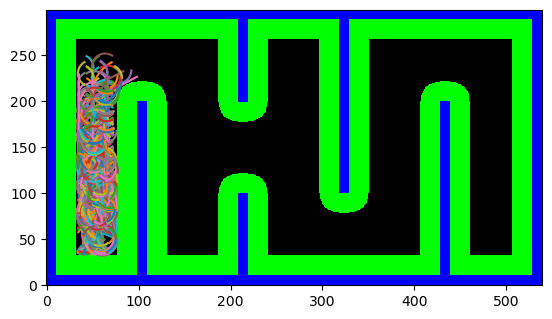

In [8]:
plot_map = cv2.cvtColor(map, cv2.COLOR_BGR2RGB)
plt.imshow(plot_map,origin='lower')
for item in closed_list:
    
    r = 3.3
    L = 28.7
    dt = -0.1
    plot_x = []
    plot_y = []
    x,y,theta = item[2]
    u_l, u_r = item[1]

    for item in range(0,time_steps):
        dx = (r/2)*(u_l+u_r)*np.cos(theta)*dt
        dy = (r/2)*(u_l+u_r)*np.sin(theta)*dt
        dtheta = (r/L)*(u_r-u_l)*dt
        x += dx
        y += dy
        theta += dtheta
        if theta > 2*pi:
            theta -= 2*pi
        elif theta < 0:
            theta += 2*pi

        plot_x.append(x)
        plot_y.append(y)
    plt.plot(plot_x,plot_y)
plt.show()


    


In [9]:
# for i in range(0,time_steps):
#         old_x = x
#         old_y = y
#         dx = (r/2)*(u_l+u_r)*np.cos(theta)*dt
#         dy = (r/2)*(u_l+u_r)*np.sin(theta)*dt
#         dtheta = (r/L)*(u_r-u_l)*dt
#         x += dx
#         y += dy
#         theta += dtheta

#         if theta > 2*pi:
#             theta -= 2*pi
#         elif theta < 0:
#             theta += 2*pi
        
#         x = round(x)
#         y = round(y)
#         theta = round(theta,3)

In [10]:
# plot_map = cv2.cvtColor(map, cv2.COLOR_BGR2RGB)
# plt.imshow(plot_map,origin='lower')
# for item in closed_list:
#     plot_x = item[1]
#     plot_y = item[2]
#     plt.plot(plot_x,plot_y)
# plt.show()
# # x = []
# # y = []
# # for item in positions:
# #     x.append(item[0])
# #     y.append(item[1])

# # plt.plot(x,y)
# # plt.show()